In [1]:
#2-2 visualization wkshop Anne Cloutier GitHub: Vetiver5

# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

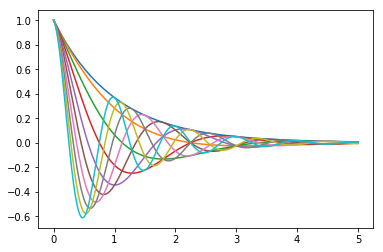

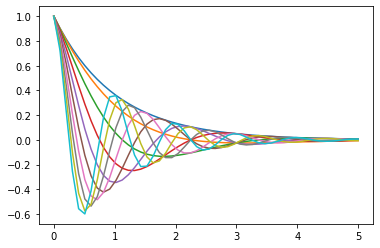

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def f(x,theta):
  return np.cos(np.pi*theta*x)*np.exp(-x)

fig, ax = plt.subplots()

x = np.linspace(0,5)
for theta in np.linspace(0,2,10):


  ax.plot(x, f(x,theta))
#f(x) = \cos(\pi \theta x) \exp(-x)

plt.show()


# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

In [3]:
df = pd.read_csv("data/tennis.csv")
df.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [4]:
#rename columns to simplify manipulation, filter data
fed = df.rename({'player1 name': 'player1', 'player1 double faults': 'dfaults', 'player1 total points total': 'tpoints_tot'}, axis=1)
fed_tidy = fed.loc[fed['player1'] == 'Roger Federer']

#cast time string to date time format (x axis)
fed_tidy['start date'] = pd.to_datetime(df['start date'])
fed_tidy.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


(0.0, 0.06363636363636364)

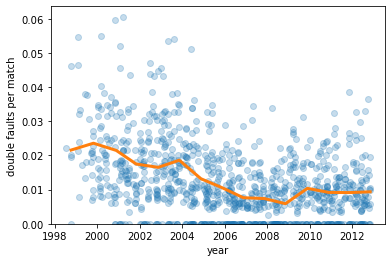

In [5]:
#prepare data for plotting
#'y = ratio of Federer double faults
#over 'total points total' in a match'
#x = years

#y data
fed_tidy['dfaults'] = fed_tidy['dfaults']/fed_tidy['tpoints_tot']

#group by years
gb = fed_tidy.groupby('year')
    
fig, ax = plt.subplots(1,1)

ax.plot_date(pd.to_datetime(fed_tidy['start date']), fed_tidy['dfaults'],
             alpha=.25, lw=0)
ax.plot_date(pd.to_datetime(gb['start date'].max()),
             gb['dfaults'].mean(),'-',lw=3)
ax.set_xlabel('year')
ax.set_ylabel('double faults per match')
ax.set_ylim(0)

#NOTE: I could not get this graphic right on my own
#- I either got the trendline OK
#or the scatter plot. I redid the whole thing after watching
#the review video. #I also had problem using the usual ax.scatter
#command with this once i tried superposing a trend line

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [6]:
 conda install pandas-datareader

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
from pandas_datareader import data
import datetime as dt
import pandas as pd

In [8]:
#import data list

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

#data read function
"""This function reads in closing price data from Yahoo
for each tick in the ticker_list.
"""
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):

    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
ticker

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,47.080002,101.120003,115.209999,47.860001,116.279999,39.480000,1539.130005,323.809998,57.400002,46.930000,1045.849976,48.720001,60.910000
2019-01-03,44.490002,97.400002,112.910004,46.389999,114.650002,35.547501,1500.280029,310.899994,55.700001,46.639999,1016.059998,47.020000,61.150002
2019-01-04,47.220001,101.930000,117.320000,49.220001,119.730003,37.064999,1575.390015,327.079987,56.599998,47.570000,1070.709961,49.209999,62.810001
2019-01-07,47.439999,102.059998,118.150002,49.480000,121.279999,36.982498,1629.510010,328.109985,56.439999,46.950001,1068.390015,49.720001,62.549999
2019-01-08,47.740002,102.800003,119.830002,49.330002,122.309998,37.687500,1656.579956,340.529999,55.950001,47.480000,1076.280029,49.889999,63.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,59.410000,157.380005,134.979996,54.459999,141.339996,71.067497,1789.209961,333.000000,88.769997,54.709999,1343.560059,67.760002,49.099998
2019-12-26,59.820000,158.669998,134.910004,54.810001,141.529999,72.477501,1868.770020,329.920013,88.400002,55.020000,1360.400024,68.019997,49.660000
2019-12-27,60.080002,158.960007,135.270004,54.930000,141.279999,72.449997,1869.800049,330.140015,88.800003,55.349998,1351.890015,67.779999,50.060001


In [9]:
#calculate stock price percentage change between
#first and last date

p1 = ticker.iloc[0]
p2 = ticker.iloc[-1]

price_change = 100 * (p2 - p1)/p1

price_change

INTC    27.124036
MSFT    55.953316
IBM     16.344062
BHP     14.312575
TM      20.863429
AAPL    85.948580
AMZN    20.057432
BA       0.602209
QCOM    53.710803
KO      17.941611
GOOG    27.840517
SNE     39.573067
PTR    -17.369887
dtype: float64

Text(0, 0.5, '% price change over year')

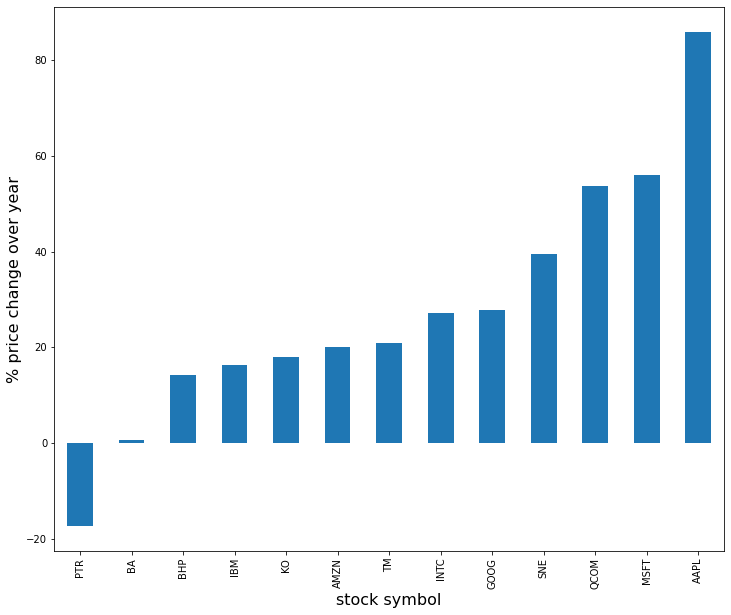

In [10]:
fig, ax = plt.subplots(figsize=(12,10))

price_change.sort_values().plot(kind='bar', ax = ax)
ax.set_xlabel('stock symbol', fontsize = 16)
ax.set_ylabel('% price change over year', fontsize = 16)

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [11]:
#import stock index list
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

indices_data = read_data(
    indices_list,
    start = dt.datetime(1975, 1, 1),
    end = dt.datetime(2021, 1, 1)
)

indices_data.head()

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1975-01-02,70.230003,60.700001,NaN,NaN
1975-01-03,70.709999,61.230000,NaN,NaN
1975-01-06,71.070000,61.740002,NaN,3717.580078
1975-01-07,71.019997,61.889999,NaN,3742.580078
1975-01-08,70.040001,61.500000,NaN,3676.020020


In [12]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first()
    p2 = indices_data.groupby(indices_data.index.year)[index].last()
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns
    
yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1975,0.284209,0.278748,NaN,0.167980
1976,0.182178,0.253907,NaN,0.133496
1977,-0.111215,0.075340,NaN,-0.027174
1978,0.024408,0.134423,NaN,0.232942
1979,0.115890,0.282587,NaN,0.087378
1980,0.283661,0.365594,NaN,0.076670
1981,-0.101144,-0.037878,NaN,0.074240
1982,0.145837,0.188616,NaN,0.038585
1983,0.192208,0.208205,NaN,0.233428


In [13]:
#i had no problem getting early data but as soon as i tried running pandas on it,
#my cells kept bugging out, introducing random returns, etc, and giving me
#syntax error on pointers ( ex: p1, returns, etc.)for no clear or fixable reason.
#after closing anaconda, re-launching the file and changing the time range =
#all ran OK.

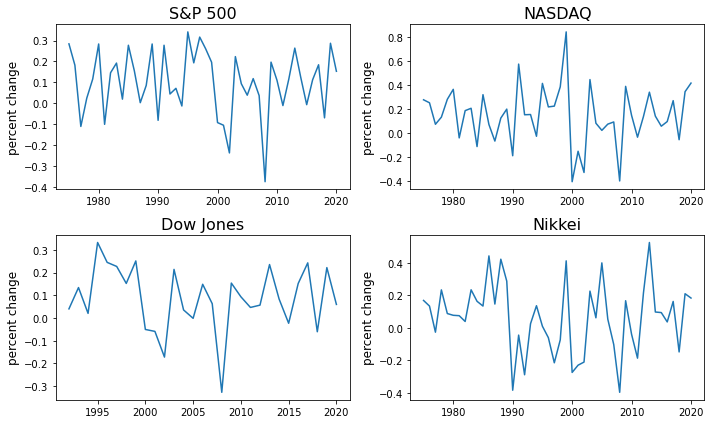

In [14]:
fig, axes = plt.subplots(2,2, figsize=(10,6))

#Flatten to 1-D array
for iter_, ax in enumerate(axes.flatten()):
    index_name = yearly_returns.columns[iter_]
    ax.plot(yearly_returns[index_name])
    ax.set_title(index_name, fontsize = 16)
    ax.set_ylabel('percent change', fontsize = 12)


plt.tight_layout()

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [ ]:
#I've tried debugging this and cannot - regardless of what i fix,
#i come up with another error. My apologies - this is the furthest i
#can take this exercise

In [24]:
#lookup the different surface types in the surface column
fed.surface.unique()

array(['Indoor: Hard', 'Outdoor: Clay', 'Indoor: Carpet', 'Outdoor: Hard',
       'Outdoor: Grass', 'Indoor: Clay'], dtype=object)

In [61]:
#Return to tennis/federer data

#new problem
fed_tidy['ratio'] = (fed_tidy['dfaults']/fed_tidy['tpoints_tot'])

#group by surface
gb = fed_tidy.groupby('year')
    
surface_list = list(fed_tidy.surface.unique())

s = 0
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize =(14,10))

plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i in range(3):
    for j in range(2):
        surf = fed_tidy.loc[fed_tidy.surface == surface_list[s]]
        axes[i,j].plot_date(pd.to_datetime(fed_tidy['start date']), fed_tidy['ratio'])
        axes[i, j].plot(pd.to_datetime(fed_tidy.groupby('year')['start date'].max(),
             groupby['dfaults'].mean(),'-',lw=3)
        axes[i,j].set_title(surface_list[s])
        axes[i,j].set_ylabel('double fault ratio')
        axes[i,j].set_xlabel('year')
        s += 1

SyntaxError: invalid syntax (<ipython-input-61-6fe0228770fb>, line 22)